#Step 1: Importing Python Packages and Libraries for Breast Cancer Classification

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


#Step 2: Loading Breast Cancer Dataset from sklearn datasets

In [10]:
# Load the dataset
Cancer_data = load_breast_cancer()
Attributes, Labels = Cancer_data.data, Cancer_data.target

#Converting loaded data into pandas dataframe to display
Cancer_df = pd.DataFrame(Cancer_data.data, columns=Cancer_data.feature_names)
Cancer_df['target'] = Cancer_data.target  # Add the target column

# Display the first 5 rows of the DataFrame
display(Cancer_df.head())


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#Step 3: Exploring Cancer Dataset


*   Analyzing null values in dataset
*   Analyzing descriptive statistics of dataset



In [11]:

# Check dataset information
display(Cancer_df.info())

# Check basic statistics
display(Cancer_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#Step 4: Splitting Cancer Dataset in Training and Tesing parts


*   Training data = 80%
*   Testing data = 20%



In [12]:
train_Atts, test_Atts, train_lbls, test_lbls = train_test_split(Attributes, Labels, test_size=0.2, random_state=42)

#Step 5: Normalizing Numeric Data Attributes

In [13]:
# Standardize the features
scaler = StandardScaler()
train_Atts = scaler.fit_transform(train_Atts)
test_Atts = scaler.transform(test_Atts)


#Step 6: Analyzing the Impact of Depth of Neural Network over its performance
##Three Experiments have been performed

*   1 Hidden Layer
*   3 Hidden Layers
*   5 Hidden Layers



In [14]:
# Function to evaluate depth impact
def evaluate_depth_impact(train_Atts, train_lbls, test_Atts, test_lbls, layer_depths, epochs=20, learning_rate=0.001):
    results = {}
    for depth in layer_depths:
        print(f"Training model with {depth} hidden layers...")
        model = Sequential()
        model.add(Dense(30, activation='relu', input_shape=(train_Atts.shape[1],)))  # Input Layer
        for _ in range(depth):
            model.add(Dense(64, activation='relu'))  # Hidden Layers
        model.add(Dense(1, activation='sigmoid'))  # Output Layer

        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(train_Atts, train_lbls, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
        results[depth] = {"model": model, "history": history}

    return results


#Step 7: Analyzing the Impact of Width of Neural Network over its performance
##Three Experiments have been performed

*   32 Neurons
*   64 Neurons
*   128 Neurons



In [15]:
# Function to evaluate width impact
def evaluate_width_impact(train_Atts, train_lbls, test_Atts, test_lbls, neuron_counts, epochs=20, learning_rate=0.001, depth=3):
    results = {}
    for neurons in neuron_counts:
        print(f"Training model with {neurons} neurons per layer...")
        model = Sequential()
        model.add(Dense(30, activation='relu', input_shape=(train_Atts.shape[1],)))  # Input Layer
        for _ in range(depth):
            model.add(Dense(neurons, activation='relu'))  # Hidden Layers
        model.add(Dense(1, activation='sigmoid'))  # Output Layer

        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(train_Atts, train_lbls, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
        results[neurons] = {"model": model, "history": history}

    return results


#Step 8: Analyzing the Impact of Learning Rate Scheduling over Neural Network performance



In [16]:
# Learning rate scheduler
def learning_rate_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Reduce by 10% after epoch 10

# Function to evaluate learning rate scheduling
def evaluate_learning_rate_schedule(train_Atts, train_lbls, test_Atts, test_lbls, depth=1, neurons=128, epochs=20):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(train_Atts.shape[1],)))  # Input Layer
    for _ in range(depth):
        model.add(Dense(neurons, activation='relu'))  # Hidden Layers
    model.add(Dense(1, activation='sigmoid'))  # Output Layer

    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    lr_scheduler = LearningRateScheduler(learning_rate_scheduler)
    history = model.fit(train_Atts, train_lbls, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0, callbacks=[lr_scheduler])
    return {"model": model, "history": history}


# Step 9: Evaluting evaluation metrics of tested models


1.   Accuracy
2.   Recall
3.   Precision
4.   F1-Score


In [17]:
# Function to evaluate model metrics
def evaluate_model_metrics(model, test_Atts, test_lbls):
    predictions = (model.predict(test_Atts) > 0.5).astype(int)  # Convert probabilities to binary labels
    accuracy = accuracy_score(test_lbls, predictions)
    precision = precision_score(test_lbls, predictions)
    recall = recall_score(test_lbls, predictions)
    f1 = f1_score(test_lbls, predictions)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}


#Step 10: Display Results

In [24]:
def create_metrics_table(results, experiment_type):
    metrics_list = []
    for key, data in results.items():
        metrics = evaluate_model_metrics(data["model"], test_Atts, test_lbls)
        metrics["Parameter"] = key  # Add the parameter (depth, width, etc.)
        metrics_list.append(metrics)

    # Create a DataFrame from the metrics list
    df = pd.DataFrame(metrics_list)
    df = df[["Parameter", "Accuracy", "Precision", "Recall", "F1-Score"]]
    print(f"\nMetrics for {experiment_type} Experiment:")
    display(df)
    #print(df.to_string(index=False))
    return df

# Step 11: Plotting Validation Loss During Model Trining

In [19]:
# Function to plot training history
def plot_training_history(results, param_name):
    pyplt.figure(figsize=(10, 6))
    for param_value, data in results.items():
        history = data["history"]
        pyplt.plot(history.history['val_loss'], label=f'{param_name}={param_value}')
    pyplt.title(f'Validation Loss vs Epochs for Different {param_name}')
    pyplt.xlabel('Epochs')
    pyplt.ylabel('Validation Loss')
    pyplt.legend()
    pyplt.show()


#Step 12: Visualize Predictions

In [20]:
# Function to create scatter plot of testing data labels vs predictions
def scatter_plot_predictions(model, test_Atts, test_lbls):
    predictions = model.predict(test_Atts).flatten()
    pyplt.figure(figsize=(8, 6))
    pyplt.scatter(test_lbls, predictions, alpha=0.6, color='blue')
    pyplt.plot([0, 1], [0, 1], '--', color='red', label='Perfect Prediction')
    pyplt.title('Testing Data Labels vs Predictions')
    pyplt.xlabel('True Labels')
    pyplt.ylabel('Predicted Labels')
    pyplt.legend()
    pyplt.show()


#Step 13: Results of Depth-Based Neural Network Analaysis

Training model with 1 hidden layers...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 3 hidden layers...
Training model with 5 hidden layers...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Metrics for Depth-Based Experiment:


,Parameter,Accuracy,Precision,Recall,F1-Score
0,1,0.982456,0.972603,1.000000,0.986111
1,3,0.964912,0.971831,0.971831,0.971831
2,5,0.956140,0.958333,0.971831,0.965035


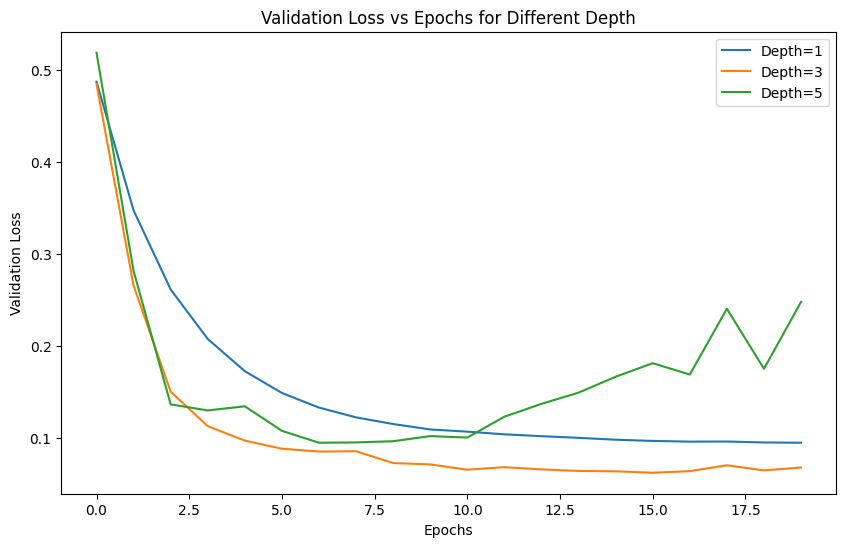

In [25]:
# Evaluate depth-based experiments
depth_results = evaluate_depth_impact(train_Atts, train_lbls, test_Atts, test_lbls, layer_depths=[1, 3, 5], epochs=20)
depth_table = create_metrics_table(depth_results, "Depth-Based")
plot_training_history(depth_results, "Depth")

#Step 14: Results of Width-Based Neural Network Analaysis

Training model with 32 neurons per layer...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with 64 neurons per layer...
Training model with 128 neurons per layer...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Metrics for Width-Based Experiment:


,Parameter,Accuracy,Precision,Recall,F1-Score
0,32,0.973684,0.972222,0.985915,0.979021
1,64,0.964912,0.971831,0.971831,0.971831
2,128,0.982456,0.972603,1.000000,0.986111


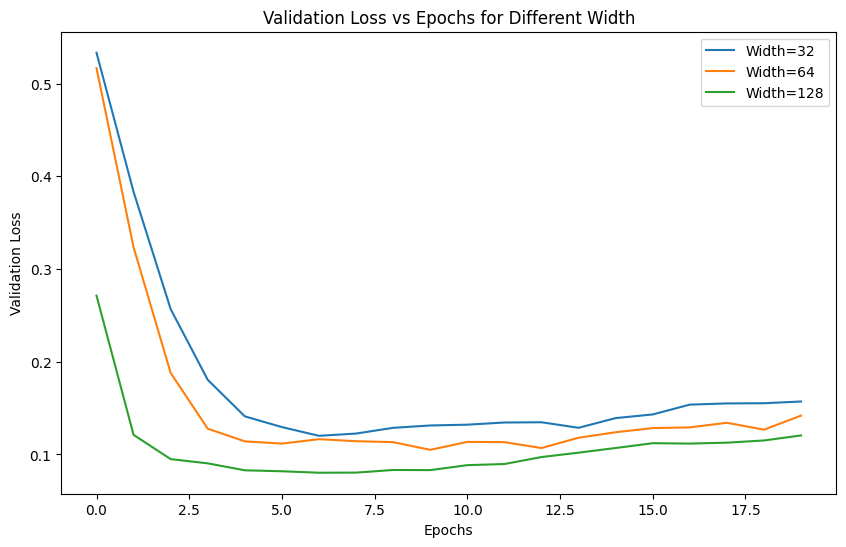

In [26]:
# Evaluate width-based experiments
width_results = evaluate_width_impact(train_Atts, train_lbls, test_Atts, test_lbls, neuron_counts=[32, 64, 128], epochs=20)
width_table = create_metrics_table(width_results, "Width-Based")
plot_training_history(width_results, "Width")



#Step 15: Results of Learning Rate Scheduling Analaysis

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Metrics for Learning Rate Scheduling Experiment:


,Parameter,Accuracy,Precision,Recall,F1-Score
0,Learning Rate Schedule,0.929825,0.956522,0.929577,0.942857


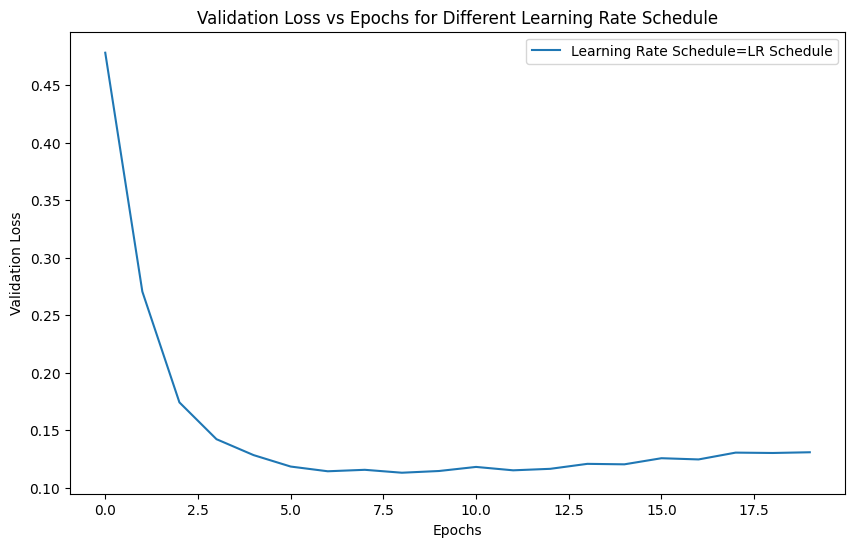

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


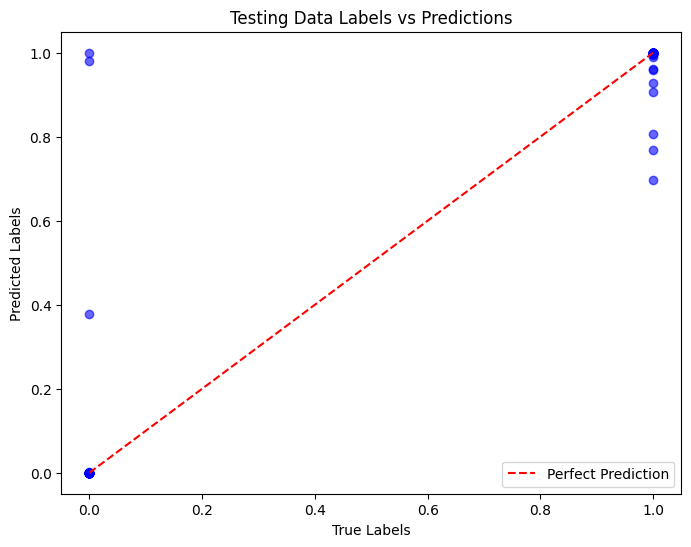

In [28]:
# Evaluate learning rate scheduling experiment
lr_results = evaluate_learning_rate_schedule(train_Atts, train_lbls, test_Atts, test_lbls, depth=3, neurons=64, epochs=20)
lr_table = create_metrics_table({"Learning Rate Schedule": lr_results}, "Learning Rate Scheduling")
plot_training_history({"LR Schedule": lr_results}, "Learning Rate Schedule")



#Step 16: Displaying Predictions of best model

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


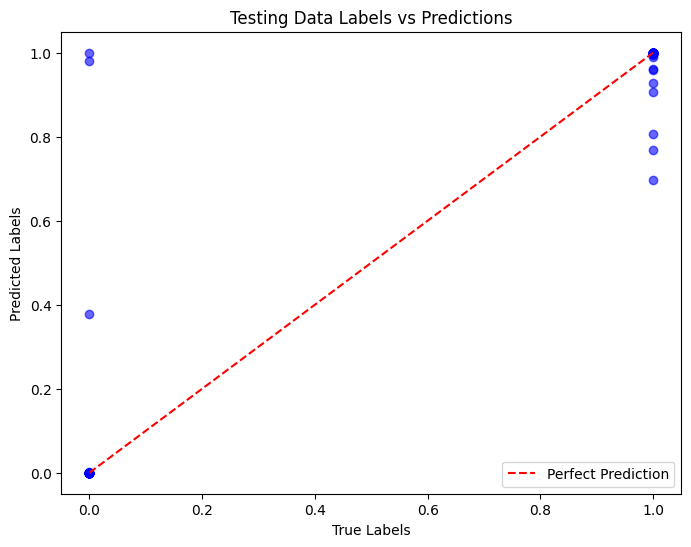

In [29]:
# Scatter plot for best model (from network with 1 layer and 128 neurons)
best_model = width_results[128]["model"]
scatter_plot_predictions(best_model, test_Atts, test_lbls)